In [2]:
from minisom import MiniSom

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

# display matplotlib plots in notebook
%matplotlib inline


In [3]:
data = pd.read_csv(
    "./datasets/ratio-ar.txt",
    names=[
        "OP",
        "ROA",
        "ROE",
        "TL",
        "DTAR",
        "CR",
        "ROI",
        "target",
        "year"
    ],
    sep="\t+",
)
t = data["target"].values
data = data[data.columns[:-2]]

# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

# initialization and training of 5x5 SOM
som = MiniSom(
    15,
    15,
    data.shape[1],
    sigma=1.5,
    learning_rate=0.4,
    activation_distance="euclidean",
    topology="hexagonal",
    neighborhood_function="gaussian",
    random_seed=3,
)

som.train(data, 5_000, verbose=True)


C:\Users\yosss\AppData\Local\Temp\ipykernel_5016\613058629.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.00015659532104535581


c:\Users\yosss\AppData\Local\Programs\Python\Python311\Lib\site-packages\minisom.py:536: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


In [4]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()


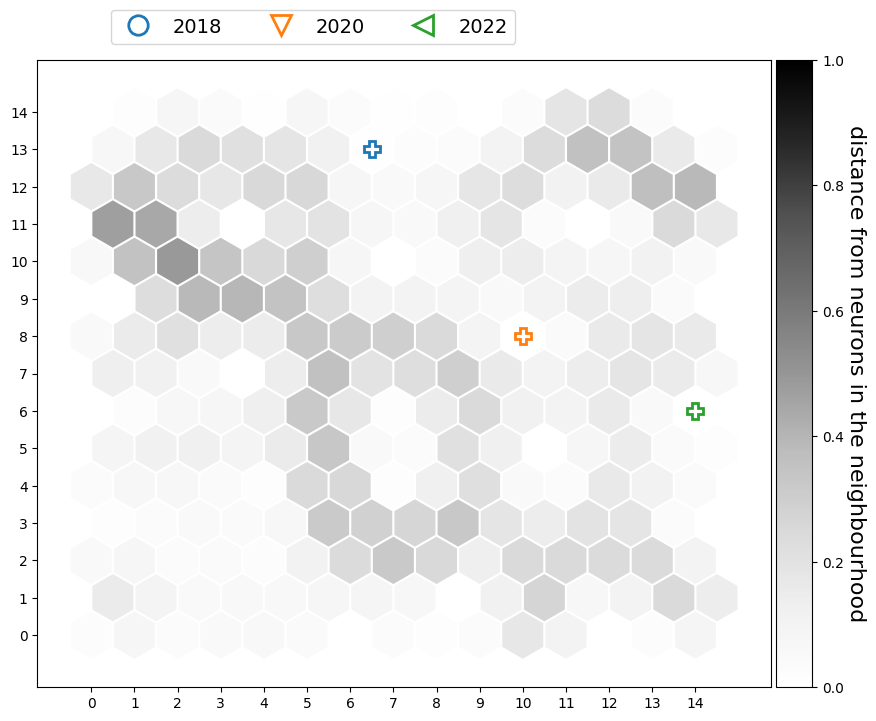

In [29]:
f = plt.figure(figsize=(10, 10))
ax = f.add_subplot(111)

ax.set_aspect("equal")

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon(
            (xx[(i, j)], wy),
            numVertices=6,
            radius=0.95 / np.sqrt(3),
            facecolor=cm.Greys(umatrix[i, j]),
            alpha=0.4,
        )
        ax.add_patch(hex)

start = 24
end = 27

markers = ["o", "v", "<", ">", "s", "p", "*", "d", "P"]
colors = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8"]
for cnt, x in enumerate(data):
    # getting the winner
    w = som.winner(x)
    # place a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w)
    wy = wy * np.sqrt(3) / 2
    if cnt >= start and cnt < end :
        plt.plot(
            wx,
            wy,
            markers[t[cnt] - 1],
            markerfacecolor="None",
            markeredgecolor=f"C{cnt-start}",
            markersize=12,
            markeredgewidth=2,
        )

xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange - 0.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cb1 = colorbar.ColorbarBase(
    ax_cb, cmap=cm.Greys, orientation="vertical", alpha=0.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel(
    "distance from neurons in the neighbourhood", rotation=270, fontsize=16
)
plt.gcf().add_axes(ax_cb)

legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="C0",
        label="2018",
        markerfacecolor="w",
        markersize=14,
        linestyle="None",
        markeredgewidth=2,
    ),
    Line2D(
        [0],
        [0],
        marker="v",
        color="C1",
        label="2020",
        markerfacecolor="w",
        markersize=14,
        linestyle="None",
        markeredgewidth=2,
    ),
    Line2D(
        [0],
        [0],
        marker="<",
        color="C2",
        label="2022",
        markerfacecolor="w",
        markersize=14,
        linestyle="None",
        markeredgewidth=2,
    ),
]
ax.legend(
    handles=legend_elements,
    bbox_to_anchor=(0.1, 1.08),
    loc="upper left",
    borderaxespad=0.0,
    ncol=3,
    fontsize=14,
)

# plt.savefig("./resulting_images/som_seed_hex.png")
plt.show()


In [ ]:
# Dataset
# Ratio:
# Operating profit - OP
# ROTA
# ROE
# Total liabilities (% of revenue) - TL
# Debt-to-Assets ratio - DTAR
# Current ratio - CR
# Investment (% of revenue) - INVST
ATIC = []
DIVA = []
EMTK = []
KREN = []
MCAS = []
MLPT = []
MTDL = []
NFCX = []
PTSN = []


# VEC REFERENCE
OP = []
ROTA = []
ROE = []
TL = []
DTAR = []
CR = []
INVST = []
